    Changdong Shao "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

### Business and data understanding

The goal of this analysis is to find what is the points to affected ticket buyer to buy the tickets or not.

### Data processing (ETL)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [4]:
df=df.replace(r'\s+', np.nan, regex=True)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
CHILD       582 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
SPORT       4273 non-null float64
COMP        1009 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [7]:
# Combine the 5 games to total games.
df['Total games'] = df['Y1G5'] + df['Y1G4']+ df['Y1G3']+ df['Y1G2']+ df['Y1G1']
df=df.drop(['CHILD','COMP','SPORT','Y1G5','Y1G4','Y1G3','Y1G2','Y1G1','OWNHOME'], axis=1)

In [8]:
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL,Total games
0,580V74KT,0,15,8,1,94.0,4.0,0.0,77,203,3
1,298S54OK,1,15,3,1,NaN,NaN,0.0,53,68,2
2,268D25AO,1,15,11,1,67.0,2.0,0.0,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,1.0,65,194,1


In [9]:
df.isnull().sum()

FAKEID            0
Y2defect          0
Y1price           0
YEARS             0
BACKER            0
AGE            1993
INCOME         1944
GNDR            498
PCTMARR           0
HOMEVAL           0
Total games       0
dtype: int64

In [10]:
df1=df.dropna()
df1.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL,Total games
0,580V74KT,0,15,8,1,94.0,4.0,0.0,77,203,3
2,268D25AO,1,15,11,1,67.0,2.0,0.0,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,1.0,65,194,1
5,611B52LL,1,15,2,0,77.0,0.0,0.0,54,92,1


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 9215
Data columns (total 11 columns):
FAKEID         6214 non-null object
Y2defect       6214 non-null int64
Y1price        6214 non-null int64
YEARS          6214 non-null int64
BACKER         6214 non-null int64
AGE            6214 non-null float64
INCOME         6214 non-null float64
GNDR           6214 non-null float64
PCTMARR        6214 non-null int64
HOMEVAL        6214 non-null int64
Total games    6214 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 582.6+ KB


### Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000164B1278>]], dtype=object)

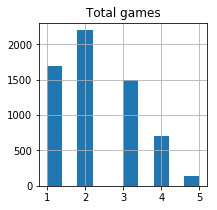

In [59]:
df1.hist('Total games', figsize=(3,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000162DABA8>]], dtype=object)

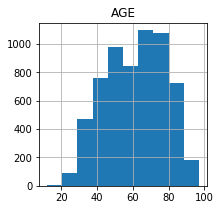

In [58]:
df1.hist('AGE', figsize=(3,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000160754A8>]], dtype=object)

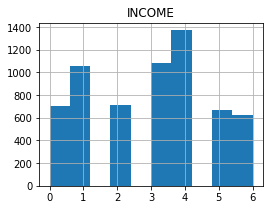

In [57]:
df1.hist('INCOME', figsize=(4,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000154B45F8>]], dtype=object)

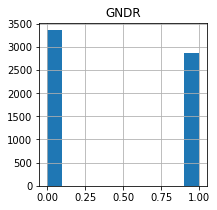

In [47]:
df1.hist('GNDR', figsize=(3,3))

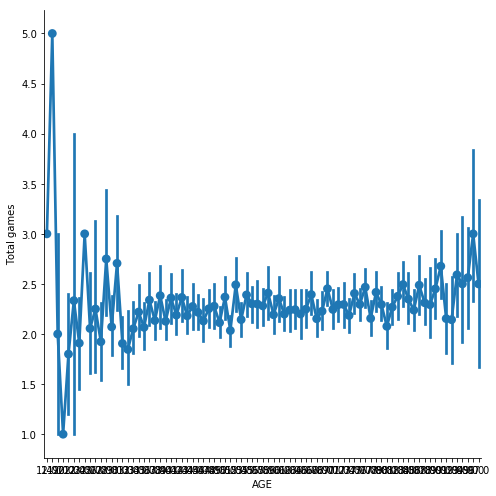

In [45]:
sns.factorplot("AGE", "Total games", data=df1, size=7)

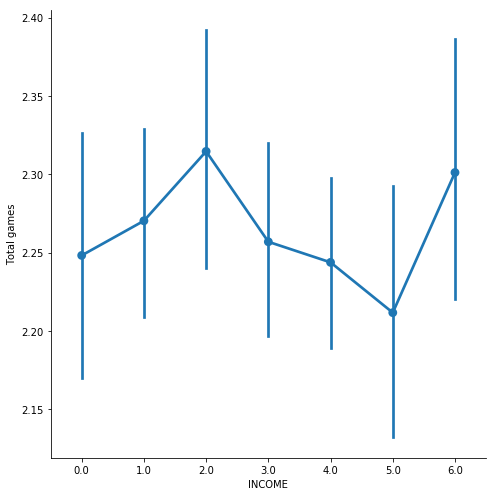

In [46]:
sns.factorplot("INCOME", "Total games", data=df1, size=7)

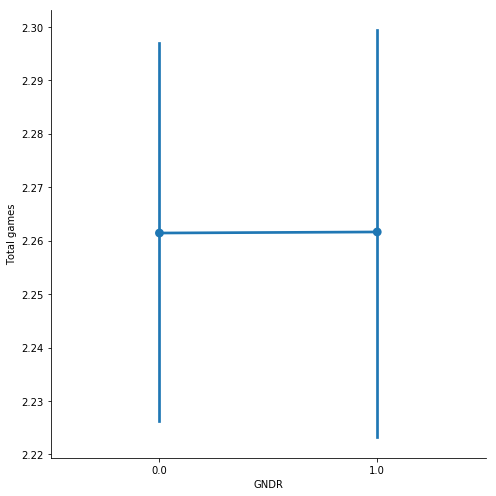

In [48]:
sns.factorplot("GNDR", "Total games", data=df1, size=7)

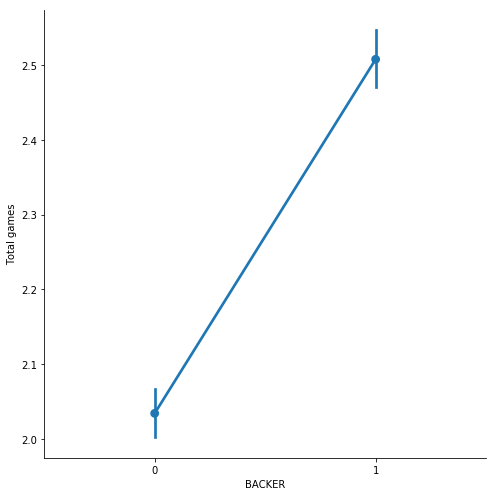

In [63]:
sns.factorplot("BACKER", "Total games", data=df1, size=7)

In [60]:
df.groupby(['Total games']).mean()

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL
Total games,,,,,,,,,
1,0.610959,19.489237,5.677495,0.358121,60.229027,2.886306,0.457155,57.727202,113.106458
2,0.523440,20.094691,6.090655,0.449860,60.761206,2.884872,0.450197,58.324744,112.087861
3,0.397712,20.331808,7.060870,0.604577,62.884790,2.909505,0.443587,58.516705,113.040275
4,0.390760,20.014437,7.236766,0.636189,62.212121,2.826087,0.434827,58.490857,108.769971
5,0.398148,19.629630,7.912037,0.763889,64.587209,2.779141,0.383495,58.546296,107.361111


### Exploratory data analysis

In [61]:
df1.corr()

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL,Total games
Y2defect,1.000000,-0.011480,-0.127372,-0.181988,-0.020781,0.011495,-0.002571,-0.011746,0.035777,-0.158519
Y1price,-0.011480,1.000000,0.037318,-0.097641,-0.038765,0.076975,0.050314,-0.011971,0.088744,0.027867
YEARS,-0.127372,0.037318,1.000000,0.527847,0.317249,-0.093972,0.002046,0.006448,-0.030175,0.214446
BACKER,-0.181988,-0.097641,0.527847,1.000000,0.200165,-0.092481,-0.010527,0.028137,-0.075744,0.225798
AGE,-0.020781,-0.038765,0.317249,0.200165,1.000000,-0.249764,0.019354,-0.058039,-0.010251,0.054177
INCOME,0.011495,0.076975,-0.093972,-0.092481,-0.249764,1.000000,0.075569,0.159971,0.313184,-0.003783
GNDR,-0.002571,0.050314,0.002046,-0.010527,0.019354,0.075569,1.000000,0.052564,0.031960,0.000095
PCTMARR,-0.011746,-0.011971,0.006448,0.028137,-0.058039,0.159971,0.052564,1.000000,0.055076,0.027692
HOMEVAL,0.035777,0.088744,-0.030175,-0.075744,-0.010251,0.313184,0.031960,0.055076,1.000000,-0.001512
Total games,-0.158519,0.027867,0.214446,0.225798,0.054177,-0.003783,0.000095,0.027692,-0.001512,1.000000


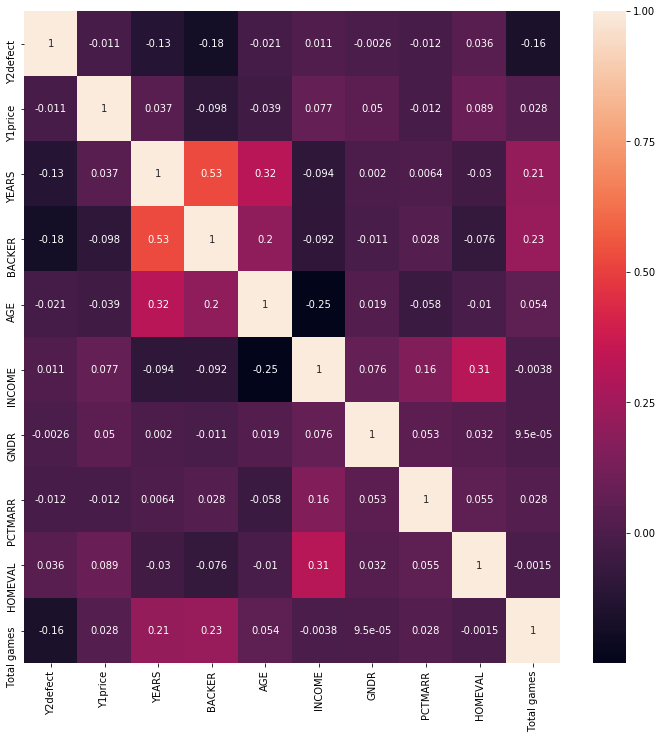

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True)

In [68]:
import scipy.stats as stats
backer_yes_totalgames = df1[df1['BACKER'] == 1]['Total games']
backer_no_totalgames = df1[df1['BACKER'] == 0]['Total games']
stats.ttest_ind(backer_yes_totalgames, backer_no_totalgames)
two_sample= stats.ttest_ind(backer_yes_totalgames, backer_no_totalgames)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 18.268 and the p-value is 0.000.


- with low p-value, we can reject null hypothesis. It indicates there is correlation between backer and total games.

# Model Development

Below is an example only. You should adapt this model.

In [12]:
y = df1['Y2defect']
X = df1.drop(['Y2defect','FAKEID'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.54745308311
--------------------------------------------------------
[[527 410]
 [434 494]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.56      0.56       937
          1       0.55      0.53      0.54       928

avg / total       0.55      0.55      0.55      1865

--------------------------------------------------------
0.547380441983


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.581233243968
[[563 374]
 [407 521]]
             precision    recall  f1-score   support

          0       0.58      0.60      0.59       937
          1       0.58      0.56      0.57       928

avg / total       0.58      0.58      0.58      1865

0.58113810124


In [17]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[   8.    1.  203.]
 [  11.    1.   38.]
 [   4.    0.   68.]
 ..., 
 [   6.    0.   95.]
 [   7.    1.   37.]
 [   7.    1.  344.]]


In [18]:
X_new = SelectKBest(chi2, k=3).fit(X, y)
print X_new.get_support(indices=True)

[1 2 7]


#### Years,Backer and Homeval is most important variables.

In [36]:
# develop a new knn model with k = 7
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
dt = KNeighborsClassifier(n_neighbors=7)
dt.fit(X_train, y_train)
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.531903485255
--------------------------------------------------------
[[746 191]
 [682 246]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.80      0.63       937
          1       0.56      0.27      0.36       928

avg / total       0.54      0.53      0.50      1865

--------------------------------------------------------
0.530622078902


In [21]:
model = LogisticRegression()
rfe = RFE(model, 2)  #asking four best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False  True]
[4 2 1 6 5 3 8 7 1]


In [22]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Y1price,4
1,YEARS,2
2,BACKER,1
3,AGE,6
4,INCOME,5
5,GNDR,3
6,PCTMARR,8
7,HOMEVAL,7
8,Total games,1


In [23]:
X_logistic = df1[['BACKER','Total games']]
print X_logistic.head()

   BACKER  Total games
0       1            3
2       1            2
3       0            3
4       0            1
5       0            1


E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


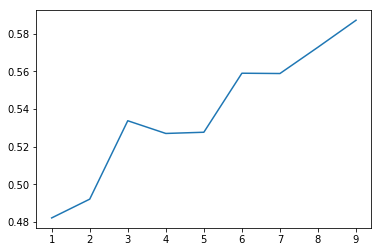

In [24]:
from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_logistic, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()

In [25]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.58722240103
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [26]:
# develop a new knn model with k = 7
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
dt = KNeighborsClassifier(n_neighbors=7)
dt.fit(X_train, y_train)
#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.531903485255
--------------------------------------------------------
[[746 191]
 [682 246]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.52      0.80      0.63       937
          1       0.56      0.27      0.36       928

avg / total       0.54      0.53      0.50      1865

--------------------------------------------------------
0.530622078902


In [27]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.590884718499
--------------------------------------------------------
[[635 302]
 [461 467]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.68      0.62       937
          1       0.61      0.50      0.55       928

avg / total       0.59      0.59      0.59      1865

--------------------------------------------------------
0.590463764582


## Model Deployment & Prepare Entry Data

In [28]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


The column names of validation dataset must be same as those of the training-testing dataset.

In [29]:
df2=df2.replace(r'\s+', np.nan, regex=True)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110


In [30]:
df2['Total games'] = df2['Y2G5'] + df2['Y2G4']+ df2['Y2G3']+ df2['Y2G2']+ df2['Y2G1']
df2=df2.drop(['Y3defect','CHILD','COMP','SPORT','Y2G5','Y2G4','Y2G3','Y2G2','Y2G1','OWNHOME'], axis=1)

In [31]:
df2.head()

,FAKEID,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL,Total games
0,580D24RR,15,5,0,49.0,4.0,0.0,66,64,2
1,179Q96NO,25,9,1,84.0,5.0,0.0,67,128,5
2,050Z45TB,15,5,1,NaN,NaN,0.0,52,113,3
3,399V18KY,15,1,0,34.0,4.0,0.0,65,81,2
4,009A52KP,25,9,1,59.0,4.0,1.0,65,110,2


In [32]:
df3=df2.dropna()
df3.head()

,FAKEID,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,PCTMARR,HOMEVAL,Total games
0,580D24RR,15,5,0,49.0,4.0,0.0,66,64,2
1,179Q96NO,25,9,1,84.0,5.0,0.0,67,128,5
3,399V18KY,15,1,0,34.0,4.0,0.0,65,81,2
4,009A52KP,25,9,1,59.0,4.0,1.0,65,110,2
5,059D43VJ,15,1,0,69.0,6.0,0.0,69,192,1


In [33]:
fakeid = pd.DataFrame(df3['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
3,399V18KY
4,009A52KP
5,059D43VJ


In [34]:
validation = df2[['BACKER','Total games']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 2 columns):
BACKER         9542 non-null int64
Total games    9542 non-null int64
dtypes: int64(2)
memory usage: 149.2 KB


In [35]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

## Final analysis & storytelling

- Mamber of Backer club has higher chance to buy more tickets in this dataset.
- Years has a positive relation with total games which means more and more people decide to buy tickets.
- Years and Backer has a highly related positive relation too.
- Age might be another point that affect Member of Backer club because it has a positive correlation.